# 第二节：python基础语法

In [1]:
import pandas as pd 
import numpy as np

from rqdatac import *
from rqfactor import *
from rqfactor.notebook import *
from rqfactor.extension import *
init()

/usr/local/lib/python3.6/site-packages/rqdatac/client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


### 2.1 数据结构

**字符串**

In [2]:
str_example = 'Hello Quant'
str_example

'Hello Quant'

In [3]:
print(str_example)

Hello Quant


**列表**

In [4]:
list_example = [1,2,3,4,5]
list_example

[1, 2, 3, 4, 5]

**字典**

In [5]:
dict_example = {'7':'seven',8:'eight',9:'nine'}   #分为keys（），values（）
dict_example

{'7': 'seven', 8: 'eight', 9: 'nine'}

**属性：索引**

In [6]:
str_example[-1]

't'

In [7]:
list_example[2]

3

In [8]:
dict_example[8]

'eight'

**属性：切片**

In [9]:
str_example[0:3]   #左闭右开

'Hel'

In [10]:
list_example[0:3]

[1, 2, 3]

**属性：类型**

In [11]:
type(str_example)   #astype(float)

str

**属性：list编辑**

In [12]:
#删除
del list_example[-1]
list_example

[1, 2, 3, 4]

In [13]:
#移除
list_example.remove(1)
list_example

[2, 3, 4]

In [14]:
#尾部添加
list_example.append('-1')
list_example

[2, 3, 4, '-1']

In [15]:
#中间插入
list_example.insert(2,'t')
list_example

[2, 3, 't', 4, '-1']

In [16]:
#批量修改
list_example[2:4]=list('yy')
list_example

[2, 3, 'y', 'y', '-1']

In [17]:
#排序
list_example = [4,2,1,3]  
list_example = sorted(list_example)
list_example

[1, 2, 3, 4]

In [18]:
#返回序列号
list_example.index(4)

3

### 案例

In [19]:
stock = index_components('000300.XSHG', '2020-01-01')   # 哪一个指数，哪一天

In [20]:
stock[:5]

['002508.XSHE', '000630.XSHE', '002410.XSHE', '600196.XSHG', '601919.XSHG']

**属性：类型的转变**

In [21]:
list(str_example)

['H', 'e', 'l', 'l', 'o', ' ', 'Q', 'u', 'a', 'n', 't']

In [22]:
str(list_example[0])

'1'

**布尔判断**

In [23]:
a = '000001.XSHE'
'XSHE' in a

True

**时间序列**

In [24]:
#获取当前时间
import datetime
datetime.datetime.now().date()

datetime.date(2022, 11, 30)

In [25]:
import time
time.strftime('%Y-%m-%d')

'2022-11-30'

In [26]:
timestamp_example = pd.Timestamp('2022-02-01')        #str变时间戳
timestamp_example

Timestamp('2022-02-01 00:00:00')

In [27]:
timestamp_example.strftime("%Y-%m-%d")               #时间戳变str

'2022-02-01'

In [28]:
rng = pd.date_range('7/25/2022', periods=30, freq='S')  #S秒M月
rng

DatetimeIndex(['2022-07-25 00:00:00', '2022-07-25 00:00:01',
               '2022-07-25 00:00:02', '2022-07-25 00:00:03',
               '2022-07-25 00:00:04', '2022-07-25 00:00:05',
               '2022-07-25 00:00:06', '2022-07-25 00:00:07',
               '2022-07-25 00:00:08', '2022-07-25 00:00:09',
               '2022-07-25 00:00:10', '2022-07-25 00:00:11',
               '2022-07-25 00:00:12', '2022-07-25 00:00:13',
               '2022-07-25 00:00:14', '2022-07-25 00:00:15',
               '2022-07-25 00:00:16', '2022-07-25 00:00:17',
               '2022-07-25 00:00:18', '2022-07-25 00:00:19',
               '2022-07-25 00:00:20', '2022-07-25 00:00:21',
               '2022-07-25 00:00:22', '2022-07-25 00:00:23',
               '2022-07-25 00:00:24', '2022-07-25 00:00:25',
               '2022-07-25 00:00:26', '2022-07-25 00:00:27',
               '2022-07-25 00:00:28', '2022-07-25 00:00:29'],
              dtype='datetime64[ns]', freq='S')

In [29]:
start_date = '2022-10-15'
end_date = '2022-11-15'
date_list = get_trading_dates(start_date, end_date, market='cn')
[i.strftime('%Y-%m-%d') for i in date_list]

['2022-10-17',
 '2022-10-18',
 '2022-10-19',
 '2022-10-20',
 '2022-10-21',
 '2022-10-24',
 '2022-10-25',
 '2022-10-26',
 '2022-10-27',
 '2022-10-28',
 '2022-10-31',
 '2022-11-01',
 '2022-11-02',
 '2022-11-03',
 '2022-11-04',
 '2022-11-07',
 '2022-11-08',
 '2022-11-09',
 '2022-11-10',
 '2022-11-11',
 '2022-11-14',
 '2022-11-15']

In [30]:
# 找出月末数据
month_list = []
date_list = [i.strftime('%Y-%m-%d') for i in date_list]
for i in range(1,len(date_list)):
    if date_list[i-1][5:7] != date_list[i][5:7]:
        month_list.append(date_list[i-1])
month_list

['2022-10-31']

### 2.2 条件与循环

**if-else判别语句**

In [31]:
# 判断同花顺是否在某个股票池内
# 股票列表
stock = ['同花顺','工商银行','五粮液']
# 判断语句
if '同花顺' in stock:
    # 满足条件输出
    print('同花顺在股票池内')
# 判断语句
else:
    # 不满足条件输出
    print('同花顺不在股票池内')

同花顺在股票池内


**for循环语句**

In [32]:
a = list()
n = 10
for i in range(1,n+1):
    a.append(i)
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [33]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

**多条件if循环判定**

In [34]:
#判断某只股票RSI指标强弱。

# 输入某只股票的RSI值【0-100】
stockRSI = 51

# 判断<20
if stockRSI<=20:
    # 输出
    print('该股票目前弱，不建议买入')
# 再次判断 20-50
elif stockRSI > 20 and stockRSI < 50:
    # 输出
    print('该股票目前较弱，建议观望')
# 再次判断
elif stockRSI == 50:
    # 输出
    print('该股票目前方向不明确，建议观望')
# 再次50-70
elif stockRSI > 50 and stockRSI < 70:
    #输出
    print('该股票目前较好，建议买一点')
# 再次判断 >70
elif stockRSI>=70:
    # 输出
    print('该股票目前好，建议买入')

该股票目前较好，建议买一点


**while continue/break语句**

In [35]:
#什么位置的时候RSI是100
stockRSI = [50,56,57,100,59,67,66,100,99,98,100]
a = 0
while a <len(stockRSI):
    if stockRSI[a] == 100: #与=区别，赋值属性，==是判定属性
        print(a)
        a += 1
        continue
    else:
        a += 1

3
7
10


**练习题：假设我们100人，依次排列，首位相连，成为一个圈，100跟1是相连的。第一个向第二个开枪，依次进行。求最后，谁能活下来。**

### 2.3 函数


　　请注意，函数体内部的语句在执行时，一旦执行到return时，函数就执行完毕，并将结果返回。因此，函数内部通过条件判断和循环可以实现非常复杂的逻辑。<br>
　　如果没有return语句，函数执行完毕后也会返回结果，只是结果为None。<br>
　　return None可以简写为return。<br><br>
**函数的参数**<br><br>
　　定义函数的时候，我们把参数的名字和位置确定下来，函数的接口定义就完成了。对于函数的调用者来说，只需要知道如何传递正确的参数，以及函数将返回什么样的值就够了，函数内部的复杂逻辑被封装起来，调用者无需了解。<br>
　　Python的函数定义非常简单，但灵活度却非常大。除了正常定义的必选参数外，还可以使用默认参数、可变参数和关键字参数，使得函数定义出来的接口，不但能处理复杂的参数，还可以简化调用者的代码。<br><br>

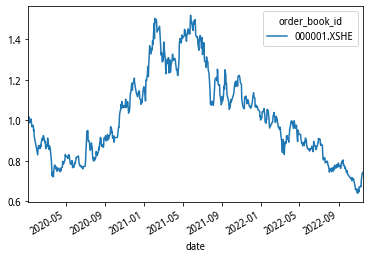

In [36]:
close = get_price('000001.XSHE','2020-01-01',end_date,fields = 'close').close.unstack('order_book_id')
net = close.pct_change().dropna()
cum_net = (net+1).cumprod()
cum_net.plot()

In [37]:
def year_ret_mean(df):
    return df.pct_change().mean() * 252

year_ret_mean(cum_net)

order_book_id
000001.XSHE   -0.051976
dtype: float64

In [38]:
def sharp_ratio(df):
    period_change = (df.iloc[-1]/df.iloc[0] - 1)[0]
    if period_change < 0:
        yield_ratio = - abs(period_change)**(252/len(df))-1
    else:
        yield_ratio = period_change**(len(df)/252 - 1)
    vol = df.pct_change().dropna().std()*np.sqrt(252)
    return (yield_ratio - 0.03)/vol

sharp_ratio(cum_net)

order_book_id
000001.XSHE   -0.368845
dtype: float64

In [39]:
# 标准化
def standardize_series(series):
    return (series-series.mean())/series.std()

data = np.array([1,2,2,1,2,3,4])
standardize_series(data)

array([-1.15470054, -0.14433757, -0.14433757, -1.15470054, -0.14433757,
        0.8660254 ,  1.87638837])

### 2.4 numpy
　　Numpy是高性能科学计算和数据分析的基础包。Numpy本身并没有提供多么高级的数据分析功能，理解 Numpuy 数组以及面向数组的计算将有助于你提高处理数据能力。本节内容介绍ndarray数组和矩阵。<br><br>

In [40]:
import numpy as np

In [41]:
a = np.array([[1,2,3.0],[2,3,4.0]])        #权重和收益率的点乘
print(a)

[[1. 2. 3.]
 [2. 3. 4.]]


**序列数组**<br><br>
　　arange函数：属于Numpy 库，其参数依次为：开始值、结束值、步长。

In [42]:
np.arange(1,100,5)   #math   #生成100个斐波那契数列，质数

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

linspace 函数创建等差序列数组，其参数依次为：开始值、结束值、元素数量。

In [43]:
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

**数组索引**<br><br>
　　Numpy 数组的每个元素、每行元素、每列元素都可以用索引访问。注意：索引是从 0 开始的。<br>
　　其操作与列表基本相同，以下是三种操作方式。<br>

In [44]:
a[0,]     #取 a 的第一行元素

array([1., 2., 3.])

In [45]:
a[:,1]   #取 a 的第二列元素

array([2., 3.])

In [46]:
a[0,2]   #取 a 的第一行的第三个元素

3.0

**数组运算**
<br>以下介绍10种常用运算

In [47]:
a = np.array([1,2,3])
b = np.array([4.,5,6])

In [48]:
a + b

array([5., 7., 9.])

In [49]:
a - b

array([-3., -3., -3.])

In [50]:
np.log(1.0) #int float  

0.0

In [51]:
a * b

array([ 4., 10., 18.])

In [52]:
a ** 2

array([1, 4, 9])

In [53]:
a/b

array([0.25, 0.4 , 0.5 ])

In [54]:
np.dot(a,b)

32.0

In [55]:
a >= 2

array([False,  True,  True])

In [56]:
a.max()

3

In [57]:
a.min()

1

In [58]:
a.sum()

6

### Pandas
pandas 是基于 Numpy 构建的，让以 Numpy 为中心的应用变得更加简单。pandas是公认的数据处理利器，本章内容主要介绍DataFrame数据结构，在此基础上进行数据处理。除了DataFrame格式，pandas 还包括series、Panel。

|格式|数组|释义|
|---|---|---|
|Series|一维数组|与Numpy中的一维array类似。
|DataFrame|二维的表格型数据结构|可以将DataFrame理解为Series的容器
|Panel|三维的数组|可以理解为DataFrame的容器
    
　　开始之前，我们首先掌握导入pandas库，方式如下：

In [59]:
import pandas as pd

**Series**

In [60]:
series_example = pd.Series([1,3,5,7,6,8,1,2,3])
series_example

0    1
1    3
2    5
3    7
4    6
5    8
6    1
7    2
8    3
dtype: int64

In [61]:
series_example[2]

5

**Series属性**

In [62]:
series_example.tolist()              #series变成list

[1, 3, 5, 7, 6, 8, 1, 2, 3]

In [63]:
series_example.index                  #查看series的索引

RangeIndex(start=0, stop=9, step=1)

In [64]:
series_example.value_counts()          #数据计数

3    2
1    2
8    1
7    1
6    1
5    1
2    1
dtype: int64

In [65]:
rng

DatetimeIndex(['2022-07-25 00:00:00', '2022-07-25 00:00:01',
               '2022-07-25 00:00:02', '2022-07-25 00:00:03',
               '2022-07-25 00:00:04', '2022-07-25 00:00:05',
               '2022-07-25 00:00:06', '2022-07-25 00:00:07',
               '2022-07-25 00:00:08', '2022-07-25 00:00:09',
               '2022-07-25 00:00:10', '2022-07-25 00:00:11',
               '2022-07-25 00:00:12', '2022-07-25 00:00:13',
               '2022-07-25 00:00:14', '2022-07-25 00:00:15',
               '2022-07-25 00:00:16', '2022-07-25 00:00:17',
               '2022-07-25 00:00:18', '2022-07-25 00:00:19',
               '2022-07-25 00:00:20', '2022-07-25 00:00:21',
               '2022-07-25 00:00:22', '2022-07-25 00:00:23',
               '2022-07-25 00:00:24', '2022-07-25 00:00:25',
               '2022-07-25 00:00:26', '2022-07-25 00:00:27',
               '2022-07-25 00:00:28', '2022-07-25 00:00:29'],
              dtype='datetime64[ns]', freq='S')

In [66]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-07-25 00:00:00    303
2022-07-25 00:00:01    151
2022-07-25 00:00:02    380
2022-07-25 00:00:03    129
2022-07-25 00:00:04    338
2022-07-25 00:00:05     16
2022-07-25 00:00:06    296
2022-07-25 00:00:07     89
2022-07-25 00:00:08     88
2022-07-25 00:00:09    265
2022-07-25 00:00:10    358
2022-07-25 00:00:11    366
2022-07-25 00:00:12     16
2022-07-25 00:00:13    470
2022-07-25 00:00:14    182
2022-07-25 00:00:15    371
2022-07-25 00:00:16    349
2022-07-25 00:00:17    465
2022-07-25 00:00:18    310
2022-07-25 00:00:19    343
2022-07-25 00:00:20    257
2022-07-25 00:00:21    147
2022-07-25 00:00:22    340
2022-07-25 00:00:23    483
2022-07-25 00:00:24    378
2022-07-25 00:00:25    489
2022-07-25 00:00:26    380
2022-07-25 00:00:27    422
2022-07-25 00:00:28     44
2022-07-25 00:00:29    242
Freq: S, dtype: int64

In [67]:
ts.resample('3S').sum()

2022-07-25 00:00:00     834
2022-07-25 00:00:03     483
2022-07-25 00:00:06     473
2022-07-25 00:00:09     989
2022-07-25 00:00:12     668
2022-07-25 00:00:15    1185
2022-07-25 00:00:18     910
2022-07-25 00:00:21     970
2022-07-25 00:00:24    1247
2022-07-25 00:00:27     708
Freq: 3S, dtype: int64

**DataFrame**<br>
　　DataFrame是一个表格型的数据结构，它含有一组有序的列，每一列的数据结构都是相同的，而不同的列之间则可以是不同的数据结构。DataFrame中的每一行是一个记录，名称为Index的一个元素，而每一列则为一个字段，是这个记录的一个属性，DataFrame既有行索引也有列索引。<br>
　　创建DataFrame<br>
　　首先来看如何从字典创建DataFrame。<br>

In [68]:
d_1 = {'one': [1, 2, 3], 'two': [1, 2,4]}                                 #方法一
d_2 = [{'three': 1.6, 'four': 2, 'five': 9}, {'three': 3, 'four': 6, 'five': 9},{'three': 8, 'four': 6, 'five': 7}]         #方法二

In [69]:
dataframe_example_1= pd.DataFrame(d_1,index=['a', 'b', 'c'])
dataframe_example_1

,one,two
a,1,1
b,2,2
c,3,4


In [70]:
dataframe_example_2= pd.DataFrame(d_2,index = ['a', 'b', 'c'])
dataframe_example_2

,five,four,three
a,9,2,1.6
b,9,6,3.0
c,7,6,8.0


In [71]:
#横向合并
dataframe_example = pd.concat([dataframe_example_2,dataframe_example_1],axis = 1)
dataframe_example

,five,four,three,one,two
a,9,2,1.6,1,1
b,9,6,3.0,2,2
c,7,6,8.0,3,4


In [72]:
#纵向合并
dataframe_example = pd.concat([dataframe_example_1,dataframe_example_2],axis = 0)
dataframe_example

,five,four,one,three,two
a,NaN,NaN,1.0,NaN,1.0
b,NaN,NaN,2.0,NaN,2.0
c,NaN,NaN,3.0,NaN,4.0
a,9.0,2.0,NaN,1.6,NaN
b,9.0,6.0,NaN,3.0,NaN
c,7.0,6.0,NaN,8.0,NaN


**DataFrame属性**

In [73]:
dataframe_example.index

Index(['a', 'b', 'c', 'a', 'b', 'c'], dtype='object')

In [74]:
dataframe_example.reset_index(inplace = True)
dataframe_example

,index,five,four,one,three,two
0,a,NaN,NaN,1.0,NaN,1.0
1,b,NaN,NaN,2.0,NaN,2.0
2,c,NaN,NaN,3.0,NaN,4.0
3,a,9.0,2.0,NaN,1.6,NaN
4,b,9.0,6.0,NaN,3.0,NaN
5,c,7.0,6.0,NaN,8.0,NaN


In [75]:
dataframe_example.set_index('index',inplace = True)
dataframe_example

,five,four,one,three,two
index,,,,,
a,NaN,NaN,1.0,NaN,1.0
b,NaN,NaN,2.0,NaN,2.0
c,NaN,NaN,3.0,NaN,4.0
a,9.0,2.0,NaN,1.6,NaN
b,9.0,6.0,NaN,3.0,NaN
c,7.0,6.0,NaN,8.0,NaN


In [76]:
dataframe_example.columns

Index(['five', 'four', 'one', 'three', 'two'], dtype='object')

In [77]:
dataframe_example.columns = ['A','B','C','D','E']
dataframe_example

,A,B,C,D,E
index,,,,,
a,NaN,NaN,1.0,NaN,1.0
b,NaN,NaN,2.0,NaN,2.0
c,NaN,NaN,3.0,NaN,4.0
a,9.0,2.0,NaN,1.6,NaN
b,9.0,6.0,NaN,3.0,NaN
c,7.0,6.0,NaN,8.0,NaN


In [78]:
dataframe_example.values

array([[nan, nan, 1. , nan, 1. ],
       [nan, nan, 2. , nan, 2. ],
       [nan, nan, 3. , nan, 4. ],
       [9. , 2. , nan, 1.6, nan],
       [9. , 6. , nan, 3. , nan],
       [7. , 6. , nan, 8. , nan]])

### stack和unstack

In [79]:
close = get_price(stock, '20200101','20220101',fields='close')

In [80]:
close

close
order_book_id date                
300033.XSHE   2020-01-02  108.2341
              2020-01-03  107.1934
              2020-01-06  110.6044
              2020-01-07  110.7007
              2020-01-08  105.4205
              2020-01-09  107.6945
              2020-01-10  107.7330
              2020-01-13  109.2843
              2020-01-14  106.8080
              2020-01-15  105.8156
              2020-01-16  104.9869
              2020-01-17  106.6539
              2020-01-20  108.3208
              2020-01-21  105.3531
              2020-01-22  107.6174
              2020-01-23  105.0737
              2020-02-03   94.5711
              2020-02-04   94.1664
              2020-02-05   95.9682
              2020-02-06   99.9380
              2020-02-07  100.8726
              2020-02-10  100.9594
              2020-02-11  100.2078
              2020-02-12  105.5940
              2020-02-13  105.9890
              2020-02-14  114.5645
              2020-02-17  122.8894
              2020-02-18  118.6595
              2020-02-19  117.0311
              2020-02-20  128.7381
...                            ...
000858.XSHE   2021-11-22  212.6989
              2021-11-23  211.5467
              2021-11-24  221.0210
              2021-11-25  219.5732
              2021-11-26  219.4846
              2021-11-29  221.3263
              2021-11-30  214.6982
              2021-12-01  217.2194
              2021-12-02  219.3763
              2021-12-03  225.9748
              2021-12-06  228.7816
              2021-12-07  230.4559
              2021-12-08  240.3044
              2021-12-09  247.1984
              2021-12-10  243.2590
              2021-12-13  246.1938
              2021-12-14  246.2135
              2021-12-15  240.1074
              2021-12-16  239.8120
              2021-12-17  231.5983
              2021-12-20  232.4256
              2021-12-21  228.1415
              2021-12-22  228.6043
              2021-12-23  233.4203
              2021-12-24  238.2756
              2021-12-27  232.6324
              2021-12-28  233.9816
              2021-12-29  222.2816
              2021-12-30  222.0846
              2021-12-31  219.2876

[1458 rows x 1 columns]

In [81]:
# unstack
close.close.unstack('order_book_id')

order_book_id,300033.XSHE,601398.XSHG,000858.XSHE
date,,,
2020-01-02,108.2341,5.0516,127.1244
2020-01-03,107.1934,5.0685,125.6518
2020-01-06,110.6044,5.0516,124.3524
2020-01-07,110.7007,5.0854,124.5160
2020-01-08,105.4205,5.0008,124.0540
2020-01-09,107.6945,5.0008,125.8635
2020-01-10,107.7330,5.0008,128.6066
2020-01-13,109.2843,5.0177,134.4200
2020-01-14,106.8080,5.0262,133.3612


In [82]:
close_change = close.close.unstack('order_book_id').pct_change().dropna()
close_change

order_book_id,300033.XSHE,601398.XSHG,000858.XSHE
date,,,
2020-01-03,-0.009615,0.003345,-0.011584
2020-01-06,0.031821,-0.003334,-0.010341
2020-01-07,0.000871,0.006691,0.001316
2020-01-08,-0.047698,-0.016636,-0.003710
2020-01-09,0.021571,0.000000,0.014586
2020-01-10,0.000357,0.000000,0.021794
2020-01-13,0.014399,0.003379,0.045203
2020-01-14,-0.022659,0.001694,-0.007877
2020-01-15,-0.009291,-0.010107,0.016167


In [83]:
close_change = close_change.unstack()
close_change

order_book_id  date      
300033.XSHE    2020-01-03   -0.009615
               2020-01-06    0.031821
               2020-01-07    0.000871
               2020-01-08   -0.047698
               2020-01-09    0.021571
               2020-01-10    0.000357
               2020-01-13    0.014399
               2020-01-14   -0.022659
               2020-01-15   -0.009291
               2020-01-16   -0.007832
               2020-01-17    0.015878
               2020-01-20    0.015629
               2020-01-21   -0.027397
               2020-01-22    0.021492
               2020-01-23   -0.023637
               2020-02-03   -0.099955
               2020-02-04   -0.004279
               2020-02-05    0.019134
               2020-02-06    0.041366
               2020-02-07    0.009352
               2020-02-10    0.000860
               2020-02-11   -0.007445
               2020-02-12    0.053750
               2020-02-13    0.003741
               2020-02-14    0.080909
               2020-02-1

**数据分组Groupby**

In [84]:
close_change = close_change.reset_index()           # 推出索引
close_change.columns = ['date','stock','return']
close_change.groupby(['date'])['return'].mean().head()

date
000858.XSHE    0.001486
300033.XSHE    0.001069
601398.XSHG   -0.000263
Name: return, dtype: float64

**案例**

In [85]:
# 获取贵州茅台近10个工作日的开盘价、最高价、最低价、收盘价，获取格式即为DataFrame
price= get_price('000001.XSHE', '20200101', '20220101', fields= ['open', 'high', 'low', 'close'])
price

open     high      low    close
order_book_id date                                          
000001.XSHE   2020-01-02  15.9585  16.2460  15.8626  16.1693
              2020-01-03  16.2364  16.5910  16.2172  16.4664
              2020-01-06  16.3035  16.6198  16.2077  16.3610
              2020-01-07  16.4185  16.5623  16.2460  16.4377
              2020-01-08  16.2939  16.3418  15.9393  15.9680
              2020-01-09  16.1118  16.2268  15.8434  16.0926
              2020-01-10  16.0926  16.1118  15.8339  15.9968
              2020-01-13  16.0543  16.3227  15.9201  16.2843
              2020-01-14  16.2843  16.5527  16.0639  16.0639
              2020-01-15  16.0926  16.1597  15.7668  15.8339
              2020-01-16  15.8339  15.8818  15.5271  15.6517
              2020-01-17  15.6997  15.8626  15.6709  15.7093
              2020-01-20  15.7476  15.9201  15.6709  15.7668
              2020-01-21  15.6613  15.6613  15.2684  15.3355
              2020-01-22  15.2588  15.4888  15.0575  15.4217
              2020-01-23  15.2588  15.2588  14.7508  14.8946
              2020-02-03  13.4089  14.0894  13.4089  13.4089
              2020-02-04  13.4664  14.0511  13.4377  13.9936
              2020-02-05  13.9840  14.2716  13.7252  14.0224
              2020-02-06  14.1949  14.2524  13.9073  14.1565
              2020-02-07  13.9936  14.0799  13.8115  14.0128
              2020-02-10  13.9073  13.9265  13.7061  13.8978
              2020-02-11  13.9936  14.3195  13.9553  14.1757
              2020-02-12  14.1757  14.2045  13.9936  14.1565
              2020-02-13  14.0990  14.2620  14.0032  14.0415
              2020-02-14  14.1374  14.5112  14.0894  14.4057
              2020-02-17  14.4153  14.7316  14.3099  14.7316
              2020-02-18  14.6933  14.6933  14.3866  14.5687
              2020-02-19  14.4728  14.7316  14.4537  14.6070
              2020-02-20  14.6358  14.9712  14.4728  14.9425
...                           ...      ...      ...      ...
              2021-11-22  17.7140  17.9302  17.5863  17.8024
              2021-11-23  17.7926  18.0284  17.3702  17.5667
              2021-11-24  17.4586  17.6354  17.3505  17.5568
              2021-11-25  17.4291  17.4782  17.3210  17.3702
              2021-11-26  17.3112  17.3603  17.2130  17.2719
              2021-11-29  17.1049  17.2621  17.0558  17.2031
              2021-11-30  17.2326  17.3702  17.0459  17.1344
              2021-12-01  17.1245  17.4586  17.0656  17.3309
              2021-12-02  17.3112  17.4979  17.0656  17.2817
              2021-12-03  17.3309  17.3898  17.1049  17.3407
              2021-12-06  17.5372  18.2347  17.4881  17.7828
              2021-12-07  17.9793  18.3428  17.8319  18.1365
              2021-12-08  18.1267  18.2249  17.8417  18.1463
              2021-12-09  18.1660  18.7260  18.0481  18.3723
              2021-12-10  18.1856  18.3723  17.9498  18.0579
              2021-12-13  18.1463  18.5491  17.8614  17.9498
              2021-12-14  17.8417  17.8516  17.2130  17.2719
              2021-12-15  17.2031  17.3505  17.0951  17.2424
              2021-12-16  17.2424  17.4193  17.1540  17.4095
              2021-12-17  17.3898  17.4389  17.2621  17.2621
              2021-12-20  17.2523  17.3407  17.1442  17.2130
              2021-12-21  17.1835  17.3996  17.1737  17.2817
              2021-12-22  17.3112  17.3309  16.9968  17.0852
              2021-12-23  17.0951  17.1245  16.9084  17.0165
              2021-12-24  17.0263  17.0459  16.9084  17.0066
              2021-12-27  17.0263  17.0459  16.8593  16.9182
              2021-12-28  16.9182  17.0263  16.7905  16.8691
              2021-12-29  16.8593  16.8593  16.4073  16.4565
              2021-12-30  16.4663  16.6530  16.4270  16.5252
              2021-12-31  16.5645  16.6038  16.1126  16.1912

[486 rows x 4 columns]

In [86]:
price = price.reset_index().iloc[:,1:].set_index('date')

In [87]:
price

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [88]:
#头部几行
price.head(10)

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [89]:
#尾部几行
price.tail()

,open,high,low,close
date,,,,
2021-12-27,17.0263,17.0459,16.8593,16.9182
2021-12-28,16.9182,17.0263,16.7905,16.8691
2021-12-29,16.8593,16.8593,16.4073,16.4565
2021-12-30,16.4663,16.6530,16.4270,16.5252
2021-12-31,16.5645,16.6038,16.1126,16.1912


In [90]:
#变量提取 series
price['close']

date
2020-01-02    16.1693
2020-01-03    16.4664
2020-01-06    16.3610
2020-01-07    16.4377
2020-01-08    15.9680
2020-01-09    16.0926
2020-01-10    15.9968
2020-01-13    16.2843
2020-01-14    16.0639
2020-01-15    15.8339
2020-01-16    15.6517
2020-01-17    15.7093
2020-01-20    15.7668
2020-01-21    15.3355
2020-01-22    15.4217
2020-01-23    14.8946
2020-02-03    13.4089
2020-02-04    13.9936
2020-02-05    14.0224
2020-02-06    14.1565
2020-02-07    14.0128
2020-02-10    13.8978
2020-02-11    14.1757
2020-02-12    14.1565
2020-02-13    14.0415
2020-02-14    14.4057
2020-02-17    14.7316
2020-02-18    14.5687
2020-02-19    14.6070
2020-02-20    14.9425
               ...   
2021-11-22    17.8024
2021-11-23    17.5667
2021-11-24    17.5568
2021-11-25    17.3702
2021-11-26    17.2719
2021-11-29    17.2031
2021-11-30    17.1344
2021-12-01    17.3309
2021-12-02    17.2817
2021-12-03    17.3407
2021-12-06    17.7828
2021-12-07    18.1365
2021-12-08    18.1463
2021-12-09    18.3723
2021-

In [91]:
#变量提取 dataframe
price[['close']]

,close
date,
2020-01-02,16.1693
2020-01-03,16.4664
2020-01-06,16.3610
2020-01-07,16.4377
2020-01-08,15.9680
2020-01-09,16.0926
2020-01-10,15.9968
2020-01-13,16.2843
2020-01-14,16.0639


In [92]:
#多变量提取 dataframe
price[['open','close']].head()

,open,close
date,,
2020-01-02,15.9585,16.1693
2020-01-03,16.2364,16.4664
2020-01-06,16.3035,16.3610
2020-01-07,16.4185,16.4377
2020-01-08,16.2939,15.9680


In [93]:
#描述性统计
price.describe()

,open,high,low,close
count,486.000000,486.000000,486.000000,486.000000
mean,17.472214,17.766417,17.187040,17.486847
std,3.455734,3.539943,3.357528,3.461013
min,11.501600,11.837100,11.415300,11.645400
25%,14.252450,14.513600,14.090975,14.361025
50%,17.537200,17.830550,17.262100,17.493000
75%,20.113725,20.429750,19.826775,20.134875
max,24.473500,24.719100,24.090300,24.571700


In [94]:
#按变量排序
price.sort_values(by='close',ascending=False).head()

,open,high,low,close
date,,,,
2021-05-26,24.2082,24.6798,24.0706,24.5717
2021-05-27,24.4735,24.7191,24.0903,24.3556
2021-02-03,22.8885,24.5456,22.7910,24.3214
2021-02-05,23.9803,24.6724,23.6586,24.3019
2021-06-09,24.0019,24.4440,23.7562,24.2180


**行索引**

In [95]:
#iloc 相对索引
price.iloc[2:3,:]

,open,high,low,close
date,,,,
2020-01-06,16.3035,16.6198,16.2077,16.361


In [96]:
price.iloc[2:3,2:4]

,low,close
date,,
2020-01-06,16.2077,16.361


In [97]:
#loc 绝对索引
price.loc['2021-09-28':'2021-09-30',]

,open,high,low,close
date,,,,
2021-09-28,17.1638,17.8516,17.1442,17.6551
2021-09-29,17.5470,18.1168,17.3996,17.8319
2021-09-30,17.7730,17.8810,17.3996,17.6158


In [98]:
price.loc['2021-09-28':'2021-09-30',['high','low']]

,high,low
date,,
2021-09-28,17.8516,17.1442
2021-09-29,18.1168,17.3996
2021-09-30,17.8810,17.3996


**逻辑指针**

In [99]:
#筛选出 open 小于 17的数据
price[price['open'] < 17].head()

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680


In [100]:
#筛选出 open 大于 15 的数据，并且 close 小于 16 的数据
price[(price.open > 15.5) & (price.close < 16)].head()

,open,high,low,close
date,,,,
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-15,16.0926,16.1597,15.7668,15.8339
2020-01-16,15.8339,15.8818,15.5271,15.6517
2020-01-17,15.6997,15.8626,15.6709,15.7093


In [101]:
#筛选确定值
price[price['high'].isin([16.3418,15.8626])]

,open,high,low,close
date,,,,
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-17,15.6997,15.8626,15.6709,15.7093


In [102]:
#使用 条件过来更改数据。
price[price>24]  = 1
price

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [103]:
price[price == 1] = None
price

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


### 查看空缺值

In [104]:
price.isnull()

,open,high,low,close
date,,,,
2020-01-02,False,False,False,False
2020-01-03,False,False,False,False
2020-01-06,False,False,False,False
2020-01-07,False,False,False,False
2020-01-08,False,False,False,False
2020-01-09,False,False,False,False
2020-01-10,False,False,False,False
2020-01-13,False,False,False,False
2020-01-14,False,False,False,False


In [105]:
price.notnull()

,open,high,low,close
date,,,,
2020-01-02,True,True,True,True
2020-01-03,True,True,True,True
2020-01-06,True,True,True,True
2020-01-07,True,True,True,True
2020-01-08,True,True,True,True
2020-01-09,True,True,True,True
2020-01-10,True,True,True,True
2020-01-13,True,True,True,True
2020-01-14,True,True,True,True


In [106]:
~price.notnull()

,open,high,low,close
date,,,,
2020-01-02,False,False,False,False
2020-01-03,False,False,False,False
2020-01-06,False,False,False,False
2020-01-07,False,False,False,False
2020-01-08,False,False,False,False
2020-01-09,False,False,False,False
2020-01-10,False,False,False,False
2020-01-13,False,False,False,False
2020-01-14,False,False,False,False


In [107]:
# 找出空缺值的位置
price.close[price.close.isnull()== True]

date
2021-02-03   NaN
2021-02-05   NaN
2021-02-08   NaN
2021-05-25   NaN
2021-05-26   NaN
2021-05-27   NaN
2021-05-28   NaN
2021-06-04   NaN
2021-06-08   NaN
2021-06-09   NaN
Name: close, dtype: float64

### 空缺值填充

In [108]:
price.fillna(method='bfill')               #向前填充

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [109]:
price.fillna(method='ffill')                #向后填充

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [110]:
price.dropna()                            #去除空缺值

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [111]:
price.shape

(486, 4)

In [112]:
price.dropna(inplace = True)                            #去除空缺值
price

,open,high,low,close
date,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693
2020-01-03,16.2364,16.5910,16.2172,16.4664
2020-01-06,16.3035,16.6198,16.2077,16.3610
2020-01-07,16.4185,16.5623,16.2460,16.4377
2020-01-08,16.2939,16.3418,15.9393,15.9680
2020-01-09,16.1118,16.2268,15.8434,16.0926
2020-01-10,16.0926,16.1118,15.8339,15.9968
2020-01-13,16.0543,16.3227,15.9201,16.2843
2020-01-14,16.2843,16.5527,16.0639,16.0639


In [113]:
price[['close']].pct_change()

,close
date,
2020-01-02,NaN
2020-01-03,0.018374
2020-01-06,-0.006401
2020-01-07,0.004688
2020-01-08,-0.028575
2020-01-09,0.007803
2020-01-10,-0.005953
2020-01-13,0.017972
2020-01-14,-0.013535


In [114]:
price['change'] = price[['close']].pct_change()
price

,open,high,low,close,change
date,,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693,NaN
2020-01-03,16.2364,16.5910,16.2172,16.4664,0.018374
2020-01-06,16.3035,16.6198,16.2077,16.3610,-0.006401
2020-01-07,16.4185,16.5623,16.2460,16.4377,0.004688
2020-01-08,16.2939,16.3418,15.9393,15.9680,-0.028575
2020-01-09,16.1118,16.2268,15.8434,16.0926,0.007803
2020-01-10,16.0926,16.1118,15.8339,15.9968,-0.005953
2020-01-13,16.0543,16.3227,15.9201,16.2843,0.017972
2020-01-14,16.2843,16.5527,16.0639,16.0639,-0.013535


In [115]:
price['net'] = (price['change'] + 1).cumprod()
price

,open,high,low,close,change,net
date,,,,,,
2020-01-02,15.9585,16.2460,15.8626,16.1693,NaN,NaN
2020-01-03,16.2364,16.5910,16.2172,16.4664,0.018374,1.018374
2020-01-06,16.3035,16.6198,16.2077,16.3610,-0.006401,1.011856
2020-01-07,16.4185,16.5623,16.2460,16.4377,0.004688,1.016599
2020-01-08,16.2939,16.3418,15.9393,15.9680,-0.028575,0.987550
2020-01-09,16.1118,16.2268,15.8434,16.0926,0.007803,0.995256
2020-01-10,16.0926,16.1118,15.8339,15.9968,-0.005953,0.989332
2020-01-13,16.0543,16.3227,15.9201,16.2843,0.017972,1.007112
2020-01-14,16.2843,16.5527,16.0639,16.0639,-0.013535,0.993481


**金融数据可视化**

In [116]:
import matplotlib.pyplot as plt  #用 import 导入 pyplot 库，并设置一个别名 plt：
plt.rcParams['font.sans-serif']=['SimHei']#中文乱码
plt.rcParams['axes.unicode_minus']=False#中文乱码

Text(0, 0.5, '净值')

/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_te

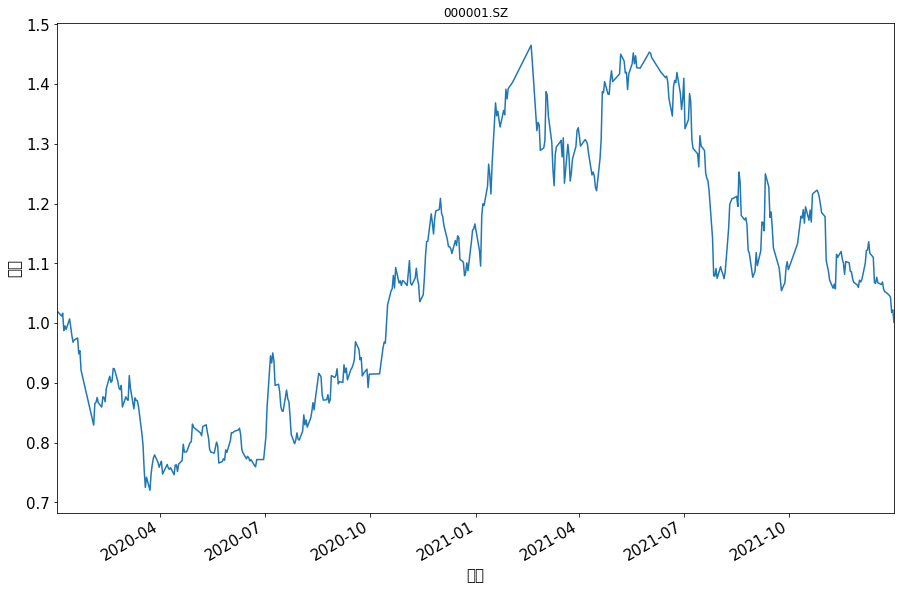

In [117]:
price.net.plot(kind='line',figsize =(15,10),fontsize = 15,title='000001.SZ')
plt.xlabel("时间",fontsize = 15)
plt.ylabel("净值",fontsize = 15)

散点图

In [122]:
from numpy.random import rand
x, y = rand(2, 100)

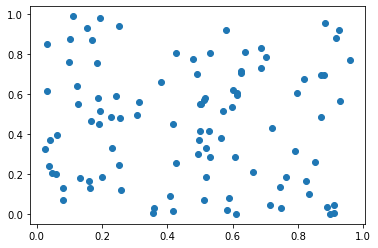

In [123]:
plt.scatter(x, y)
plt.show()